## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

## Data Loading

In [ ]:
os.listdir()

['.config',
 'model',
 'RF_model_toddler.pkl',
 'Child.csv',
 'Toddler.csv',
 'ANN_model_toddler.h5',
 'SVM_model_toddler.pkl',
 'sample_data']

In [ ]:
df=pd.read_csv(filepath_or_buffer="Toddler.csv")

In [ ]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
print(df.shape)

(1054, 19)


## Data Preprocessing

In [ ]:
print(df.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class'],
      dtype='object')


***dropping unwanted columns***

In [ ]:
df=df.drop(labels=["Case_No","Ethnicity"],axis=1)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,f,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,no,yes,family member,Yes


***renaming the columns***

In [ ]:
df=df.rename(columns={"Qchat-10-Score":"Q_Score"})

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,f,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,no,yes,family member,Yes


***Visualizing Age_Mons Column***

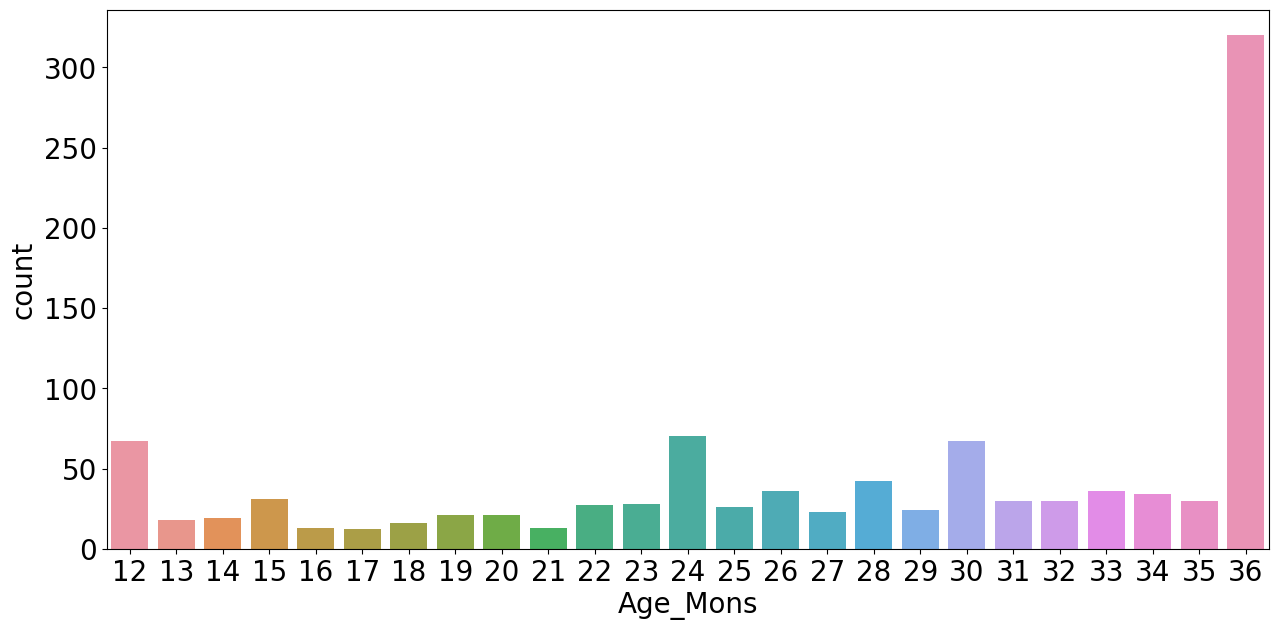

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams["font.size"]=20
sns.countplot(x="Age_Mons",data=df)
plt.show()

***Visualizing Sex Column***

In [ ]:
df["Sex"].value_counts()

m    735
f    319
Name: Sex, dtype: int64

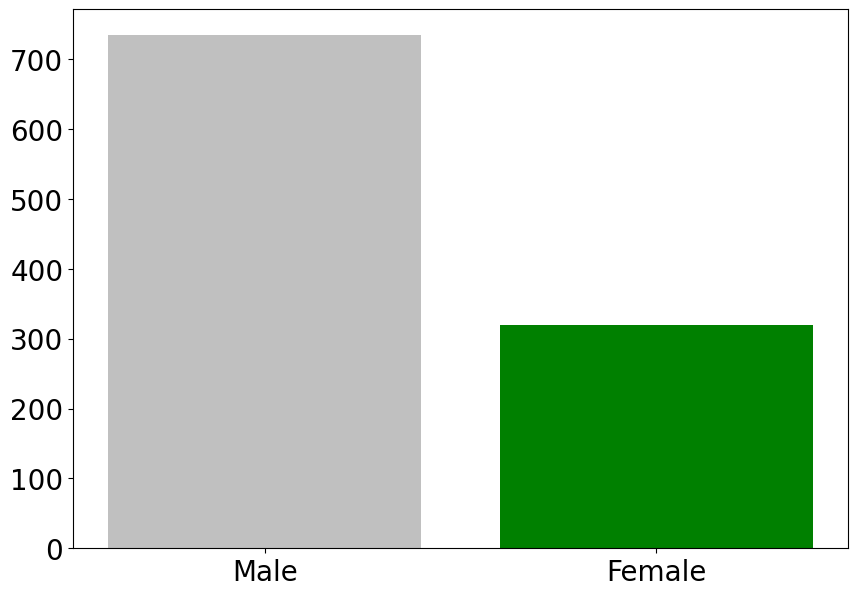

In [ ]:
plt.figure(figsize=(10,7))
plt.rcParams["font.size"]=20
plt.bar(x=["Male","Female"],height=df["Sex"].value_counts(),color=["Silver","green"])
plt.show()

In [ ]:
df["Sex"].replace(to_replace=["m","f"],value=[0,1],inplace=True)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,no,yes,family member,Yes


***Visualizing Jaundice***

In [ ]:
df["Jaundice"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df["Jaundice"].value_counts()

no     766
yes    288
Name: Jaundice, dtype: int64

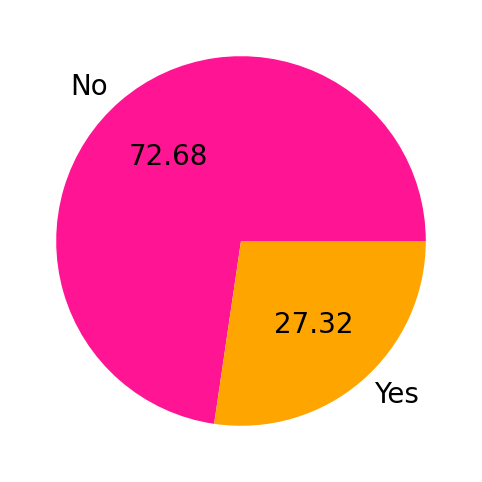

In [ ]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.pie(x=df["Jaundice"].value_counts(),labels=["No","Yes"],colors=["deeppink","orange"],autopct="%.2f")
plt.show()

In [ ]:
df["Jaundice"].replace(to_replace=["no","yes"],value=[0,1],inplace=True)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,yes,family member,Yes


***Visualizing Family_mem_with_ASD column***

In [ ]:
df["Family_mem_with_ASD"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df["Family_mem_with_ASD"].value_counts()

no     884
yes    170
Name: Family_mem_with_ASD, dtype: int64

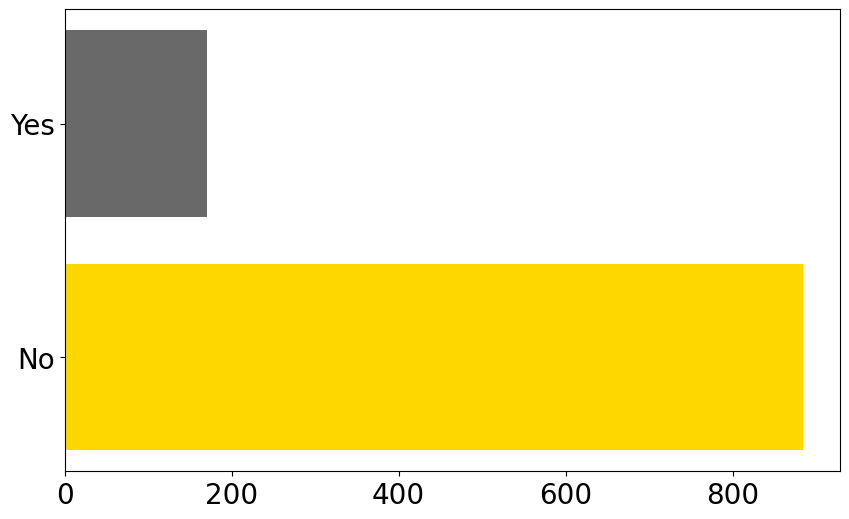

In [ ]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.barh(y=["No","Yes"],width=df["Family_mem_with_ASD"].value_counts(),color=["gold","dimgray"])
plt.show()

In [ ]:
df["Family_mem_with_ASD"].replace(to_replace=["no","yes"],value=[0,1],inplace=True)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,family member,Yes


***visualizing Who completed the test column***

In [ ]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [ ]:
df["Who completed the test"].replace(to_replace="Health care professional",value="Health Care Professional",inplace=True)

In [ ]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional', 'Self', 'Others'],
      dtype=object)

In [ ]:
df["Who completed the test"].value_counts()

family member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [ ]:
df["Who completed the test"].replace(to_replace=["family member","Health Care Professional","Self","Others"],value=[0,1,2,3],inplace=True)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,0,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,0,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,0,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,0,Yes


***Analyzing and Visualizing Class column***

In [ ]:
df["Class"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["Class"].value_counts()

Yes    728
No     326
Name: Class, dtype: int64

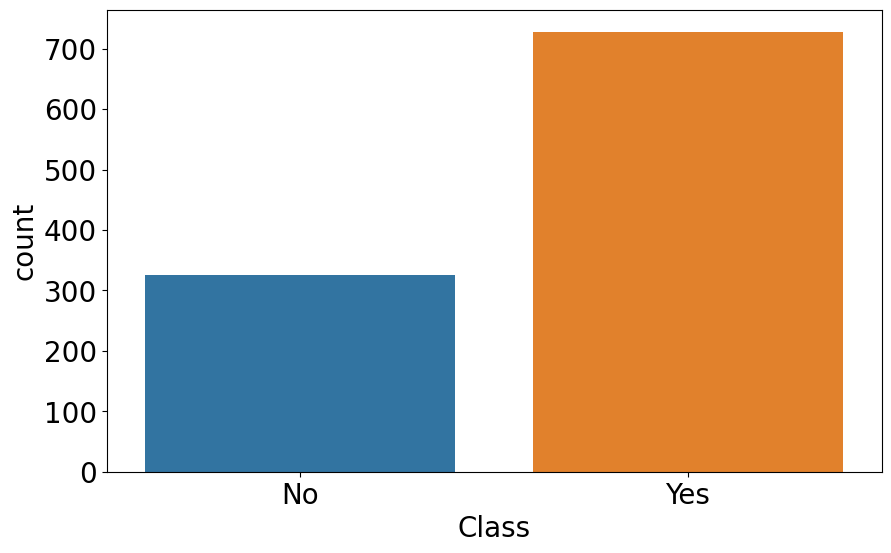

In [ ]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
sns.countplot(x="Class",data=df)
plt.show()

In [ ]:
df["Class"].replace(to_replace=["No","Yes"],value=[0,1],inplace=True)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,0,1


In [ ]:
df.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Q_Score                   0
Sex                       0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   A1                      1054 non-null   int64
 1   A2                      1054 non-null   int64
 2   A3                      1054 non-null   int64
 3   A4                      1054 non-null   int64
 4   A5                      1054 non-null   int64
 5   A6                      1054 non-null   int64
 6   A7                      1054 non-null   int64
 7   A8                      1054 non-null   int64
 8   A9                      1054 non-null   int64
 9   A10                     1054 non-null   int64
 10  Age_Mons                1054 non-null   int64
 11  Q_Score                 1054 non-null   int64
 12  Sex                     1054 non-null   int64
 13  Jaundice                1054 non-null   int64
 14  Family_mem_with_ASD     1054 non-null   int64
 15  Who completed the tes

In [ ]:
X=df.drop(labels="Class",axis=1)
y=df["Class"]

In [ ]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,0
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(843, 16) (211, 16) (843,) (211,)


## Model-1 Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc_model=SVC(tol=3)
svc_model.fit(X_train,y_train)

SVC(tol=3)

In [ ]:
svc_pred=svc_model.predict(X_test)

In [ ]:
print(svc_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
Not_Autism=0
Autism=0
for predicted_label in svc_pred:
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"SupportVectorClassifier model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(svc_pred)} test samples.")

SupportVectorClassifier model predicted 211 samples as AUTISM and 0 samples as NOT_AUTISM from 211 test samples.


## Result Analysis

***Accuracy Score***

In [ ]:
svc_accuracy=accuracy_score(y_true=y_test,y_pred=svc_pred)
print("SupportVectorClassifier Accuracy is {:.2f}".format(svc_accuracy*100))

SupportVectorClassifier Accuracy is 67.30


***Classification Report***

In [ ]:
print(classification_report(y_true=y_test,y_pred=svc_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00        69
         Yes       0.67      1.00      0.80       142

    accuracy                           0.67       211
   macro avg       0.34      0.50      0.40       211
weighted avg       0.45      0.67      0.54       211



***Confusion Matrix***

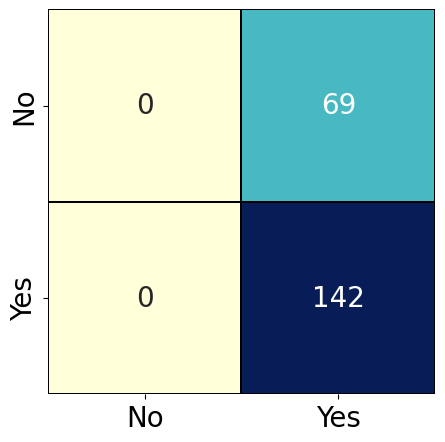

In [ ]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=svc_pred),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

## Model Saving

In [ ]:
with open(file="SVM_model_toddler.pkl",mode="wb") as file:
    pickle.dump(obj=svc_model,file=file)

## Model-2 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=1,min_samples_split=10,min_samples_leaf=10)
RF_model.fit(X=X_train,y=y_train)

RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       n_estimators=1)

In [ ]:
RF_pred=RF_model.predict(X=X_test)

In [ ]:
print(RF_pred)

[1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0]


In [ ]:
Not_Autism=0
Autism=0
for predicted_label in RF_pred:
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"RandomForestClassifier model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(RF_pred)} test samples.")

RandomForestClassifier model predicted 145 samples as AUTISM and 66 samples as NOT_AUTISM from 211 test samples.


## Result Analysis

***Accuracy score***

In [ ]:
RF_accuracy=accuracy_score(y_true=y_test,y_pred=RF_pred)
print("RandomForestClassifier accuracy is {:.2f}".format(RF_accuracy*100))

RandomForestClassifier accuracy is 98.58


***Classification report***

In [ ]:
print(classification_report(y_true=y_test,y_pred=RF_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      0.96      0.98        69
         Yes       0.98      1.00      0.99       142

    accuracy                           0.99       211
   macro avg       0.99      0.98      0.98       211
weighted avg       0.99      0.99      0.99       211



***Confusion Matrix***

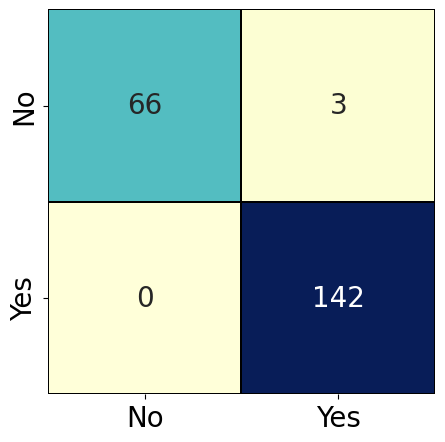

In [ ]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=RF_pred),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

In [ ]:
with open(file="RF_model_toddler.pkl",mode="wb") as file:
    pickle.dump(obj=RF_model,file=file)

## Model-3 ANN(Artificial Neural Network)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import optimizers

In [ ]:
hidden_units=100
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=10

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=16, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1700      
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x=X_train,y=y_train,epochs=no_epochs, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
27/27 [==============================] - 1s 13ms/step - loss: 0.4736 - accuracy: 0.7734 - val_loss: 0.2627 - val_accuracy: 0.9384
Epoch 2/10
27/27 [==============================] - 0s 6ms/step - loss: 0.2094 - accuracy: 0.9419 - val_loss: 0.1430 - val_accuracy: 0.9716
Epoch 3/10
27/27 [==============================] - 0s 6ms/step - loss: 0.1377 - accuracy: 0.9620 - val_loss: 0.1160 - val_accuracy: 0.9573
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 0.1102 - accuracy: 0.9561 - val_loss: 0.0798 - val_accuracy: 0.9810
Epoch 5/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0821 - accuracy: 0.9822 - val_loss: 0.0661 - val_accuracy: 0.9810
Epoch 6/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0690 - accuracy: 0.9810 - val_loss: 0.0641 - val_accuracy: 0.9763
Epoch 7/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0527 - accuracy: 0.9893 - val_loss: 0.0514 - val_accuracy: 0.9810
Epoch 8/10
27/27 [=

## Model Accuracy and Loss Plot-Graphs

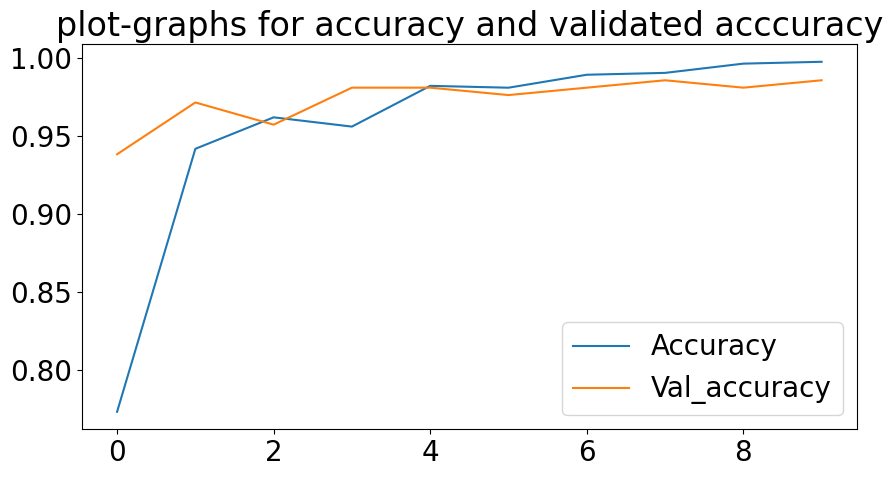

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(label="plot-graphs for accuracy and validated acccuracy")
plt.legend(["Accuracy","Val_accuracy"])
plt.show()

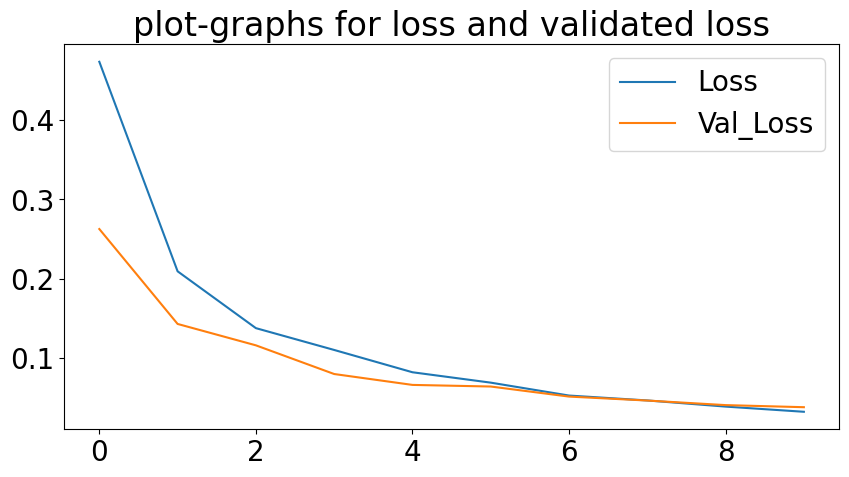

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title(label="plot-graphs for loss and validated loss")
plt.legend(["Loss","Val_Loss"])
plt.show()

## Model Saving

In [ ]:
model.save("model/Toddler/ANN_model_toddler.h5")

In [ ]:
ann_pred=model.predict(x=X_test,batch_size=10,verbose=1)

22/22 [==============================] - 0s 1ms/step


In [ ]:
print(ann_pred)

[[9.99707580e-01]
 [6.15600526e-01]
 [1.17862206e-02]
 [9.98986363e-01]
 [9.54440057e-01]
 [1.11952389e-03]
 [9.99916196e-01]
 [1.97126903e-02]
 [9.99921501e-01]
 [1.03102159e-03]
 [9.99714911e-01]
 [3.04919904e-05]
 [3.91950016e-05]
 [3.39213366e-05]
 [9.99760866e-01]
 [9.99684274e-01]
 [9.81199563e-01]
 [9.99715328e-01]
 [9.99874890e-01]
 [9.99806345e-01]
 [9.99918282e-01]
 [1.22038597e-04]
 [9.99802232e-01]
 [9.99697804e-01]
 [1.10076882e-01]
 [9.99903858e-01]
 [9.99475658e-01]
 [9.99333084e-01]
 [9.99544799e-01]
 [9.97198522e-01]
 [9.99885619e-01]
 [1.30062236e-03]
 [9.99927759e-01]
 [9.99877930e-01]
 [9.94781315e-01]
 [9.99512374e-01]
 [9.94778574e-01]
 [9.99645293e-01]
 [9.99719262e-01]
 [9.99779522e-01]
 [2.28489880e-02]
 [9.99937654e-01]
 [9.99174833e-01]
 [9.96530890e-01]
 [2.18697405e-05]
 [1.74374564e-03]
 [9.99689221e-01]
 [1.72009735e-04]
 [9.97732520e-01]
 [9.99563515e-01]
 [9.98914540e-01]
 [9.99418497e-01]
 [3.43224369e-02]
 [9.99785185e-01]
 [9.98205781e-01]
 [9.994220

In [ ]:
rounded = [int(round(x[0])) for x in ann_pred]
print(rounded)

[1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [ ]:
y_true=list(y_test)

In [ ]:
print(y_true)

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [ ]:
Not_Autism=0
Autism=0
for predicted_label in rounded :
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"ArtificialNeuralNetwork model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(rounded )} test samples.")

ArtificialNeuralNetwork model predicted 145 samples as AUTISM and 66 samples as NOT_AUTISM from 211 test samples.


## Result Analysis

***Accuracy Score***

In [ ]:
ann_accuracy=accuracy_score(y_true=y_true,y_pred=rounded)
print("ANN Accuracy is {:.2f}".format(ann_accuracy*100))

ANN Accuracy is 98.58


## Accuracy Comparision for Toddler Dataset

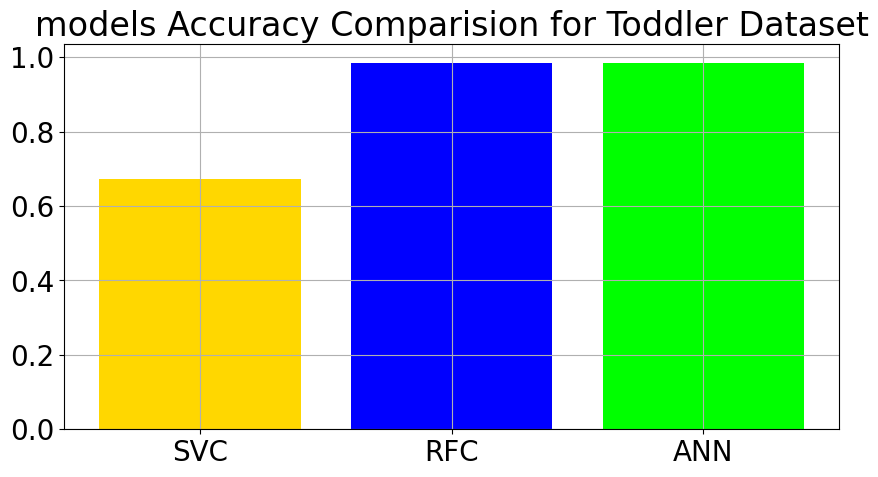

In [ ]:
data=[svc_accuracy,RF_accuracy,ann_accuracy]
labels=["SVC","RFC","ANN"]
colors=["gold","blue","lime"]
plt.figure(figsize=(10,5))
plt.grid()
plt.bar(x=labels,height=data,color=colors)
plt.title(label="models Accuracy Comparision for Toddler Dataset")
plt.show()

##Comparartive Analysis

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(737, 16) (317, 16) (737,) (317,)


## Model-1 Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc_model=SVC(tol=3)
svc_model.fit(X_train,y_train)

SVC(tol=3)

In [ ]:
svc_pred=svc_model.predict(X_test)

In [ ]:
print(svc_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
Not_Autism=0
Autism=0
for predicted_label in svc_pred:
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"SupportVectorClassifier model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(svc_pred)} test samples.")

SupportVectorClassifier model predicted 317 samples as AUTISM and 0 samples as NOT_AUTISM from 317 test samples.


## Result Analysis

***Accuracy Score***

In [ ]:
svc_accuracy2=accuracy_score(y_true=y_test,y_pred=svc_pred)
print("SupportVectorClassifier Accuracy is {:.2f}".format(svc_accuracy*100))

SupportVectorClassifier Accuracy is 67.30


***Classification Report***

In [ ]:
print(classification_report(y_true=y_test,y_pred=svc_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00        98
         Yes       0.69      1.00      0.82       219

    accuracy                           0.69       317
   macro avg       0.35      0.50      0.41       317
weighted avg       0.48      0.69      0.56       317



***Confusion Matrix***

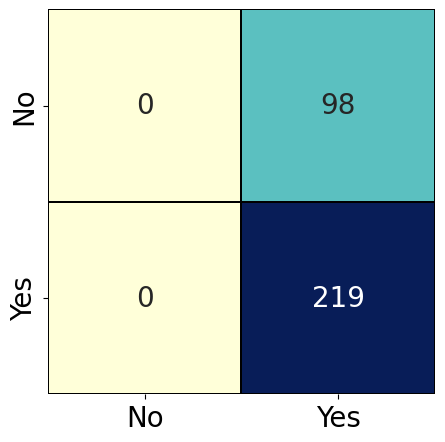

In [ ]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=svc_pred),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

## Model Saving

In [ ]:
with open(file="model/Toddler/SVM_model_toddler.pkl",mode="wb") as file:
    pickle.dump(obj=svc_model,file=file)

## Model-2 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=1,min_samples_split=10,min_samples_leaf=10)
RF_model.fit(X=X_train,y=y_train)

RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       n_estimators=1)

In [ ]:
RF_pred=RF_model.predict(X=X_test)

In [ ]:
print(RF_pred)

[1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
Not_Autism=0
Autism=0
for predicted_label in RF_pred:
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"RandomForestClassifier model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(RF_pred)} test samples.")

RandomForestClassifier model predicted 221 samples as AUTISM and 96 samples as NOT_AUTISM from 317 test samples.


## Result Analysis

***Accuracy score***

In [ ]:
RF_accuracy2=accuracy_score(y_true=y_test,y_pred=RF_pred)
print("RandomForestClassifier accuracy is {:.2f}".format(RF_accuracy*100))

RandomForestClassifier accuracy is 98.58


***Classification report***

In [ ]:
print(classification_report(y_true=y_test,y_pred=RF_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      0.98      0.99        98
         Yes       0.99      1.00      1.00       219

    accuracy                           0.99       317
   macro avg       1.00      0.99      0.99       317
weighted avg       0.99      0.99      0.99       317



***Confusion Matrix***

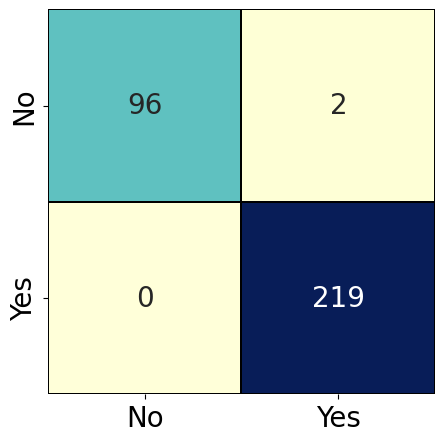

In [ ]:
plt.figure(figsize=(5,5))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=RF_pred),
            cbar=False,
            annot=True,
            fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="YlGnBu",
            linecolor="black",
            linewidths=0.2)
plt.show()

In [ ]:
with open(file="model/Toddler/RF_model_toddler.pkl",mode="wb") as file:
    pickle.dump(obj=RF_model,file=file)

## Model-3 ANN(Artificial Neural Network)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import optimizers

In [ ]:
hidden_units=100
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=10

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=16, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               1700      
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x=X_train,y=y_train,epochs=no_epochs, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
24/24 [==============================] - 1s 11ms/step - loss: 0.5986 - accuracy: 0.7286 - val_loss: 0.3583 - val_accuracy: 0.8896
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2829 - accuracy: 0.9077 - val_loss: 0.1994 - val_accuracy: 0.9432
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1778 - accuracy: 0.9376 - val_loss: 0.1324 - val_accuracy: 0.9653
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1340 - accuracy: 0.9552 - val_loss: 0.1041 - val_accuracy: 0.9716
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1106 - accuracy: 0.9593 - val_loss: 0.1062 - val_accuracy: 0.9558
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0882 - accuracy: 0.9688 - val_loss: 0.0779 - val_accuracy: 0.9748
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0684 - accuracy: 0.9864 - val_loss: 0.0663 - val_accuracy: 0.9748
Epoch 8/10
24/24 [=

## Model Accuracy and Loss Plot-Graphs

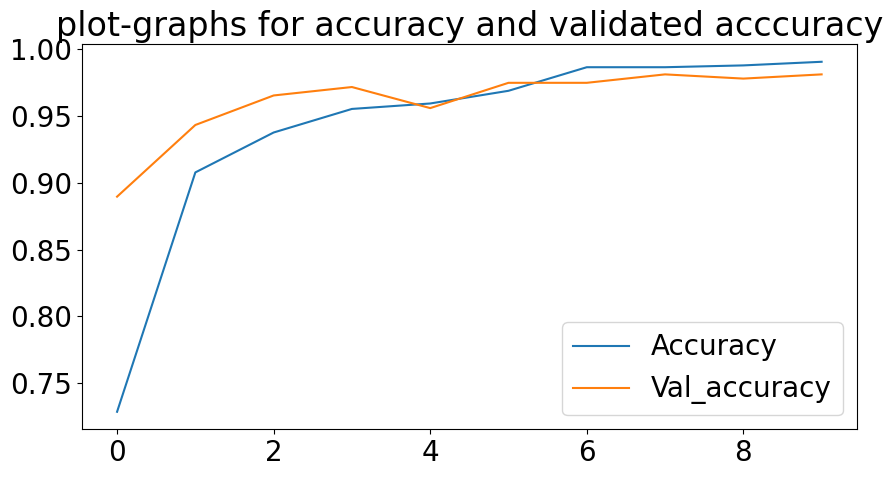

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(label="plot-graphs for accuracy and validated acccuracy")
plt.legend(["Accuracy","Val_accuracy"])
plt.show()

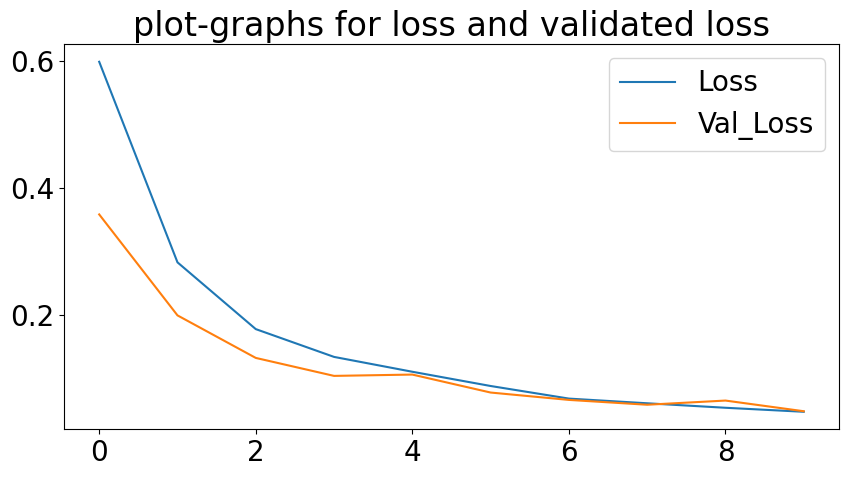

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title(label="plot-graphs for loss and validated loss")
plt.legend(["Loss","Val_Loss"])
plt.show()

## Model Saving

In [ ]:
model.save("model/Toddler/ANN_model_toddler.h5")

In [ ]:
ann_pred=model.predict(x=X_test,batch_size=10,verbose=1)

32/32 [==============================] - 0s 1ms/step


In [ ]:
print(ann_pred)

[[9.98349488e-01]
 [5.65399408e-01]
 [2.43493114e-02]
 [9.94968891e-01]
 [9.17813420e-01]
 [2.77960161e-03]
 [9.99536932e-01]
 [5.07120676e-02]
 [9.99594390e-01]
 [1.55056501e-03]
 [9.98556674e-01]
 [1.28378699e-04]
 [1.87614336e-04]
 [1.12240523e-04]
 [9.98989046e-01]
 [9.99090493e-01]
 [9.50530291e-01]
 [9.98675108e-01]
 [9.99318779e-01]
 [9.99285519e-01]
 [9.99546707e-01]
 [2.89453223e-04]
 [9.99163389e-01]
 [9.98285830e-01]
 [8.39430615e-02]
 [9.99494553e-01]
 [9.96552706e-01]
 [9.96502459e-01]
 [9.98428345e-01]
 [9.91775692e-01]
 [9.99319077e-01]
 [1.91433972e-03]
 [9.99603152e-01]
 [9.99532700e-01]
 [9.75813568e-01]
 [9.98289764e-01]
 [9.80367839e-01]
 [9.98668849e-01]
 [9.98993337e-01]
 [9.99153733e-01]
 [3.22969109e-02]
 [9.99658763e-01]
 [9.97602105e-01]
 [9.86926615e-01]
 [6.04731213e-05]
 [3.21524334e-03]
 [9.98619378e-01]
 [5.43327013e-04]
 [9.92298484e-01]
 [9.98189151e-01]
 [9.93771732e-01]
 [9.97313201e-01]
 [7.88570717e-02]
 [9.99092042e-01]
 [9.95310903e-01]
 [9.970568

In [ ]:
rounded = [int(round(x[0])) for x in ann_pred]
print(rounded)

[1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
y_true=list(y_test)

In [ ]:
print(y_true)

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
Not_Autism=0
Autism=0
for predicted_label in rounded :
    if predicted_label==0:
        Not_Autism+=1
    else:
        Autism+=1
print(f"ArtificialNeuralNetwork model predicted {Autism} samples as AUTISM and {Not_Autism} samples as NOT_AUTISM from {len(rounded )} test samples.")

ArtificialNeuralNetwork model predicted 221 samples as AUTISM and 96 samples as NOT_AUTISM from 317 test samples.


## Result Analysis

***Accuracy Score***

In [ ]:
ann_accuracy2=accuracy_score(y_true=y_true,y_pred=rounded)
print("ANN Accuracy is {:.2f}".format(ann_accuracy*100))

ANN Accuracy is 98.58


## Accuracy Comparision for Toddler Dataset

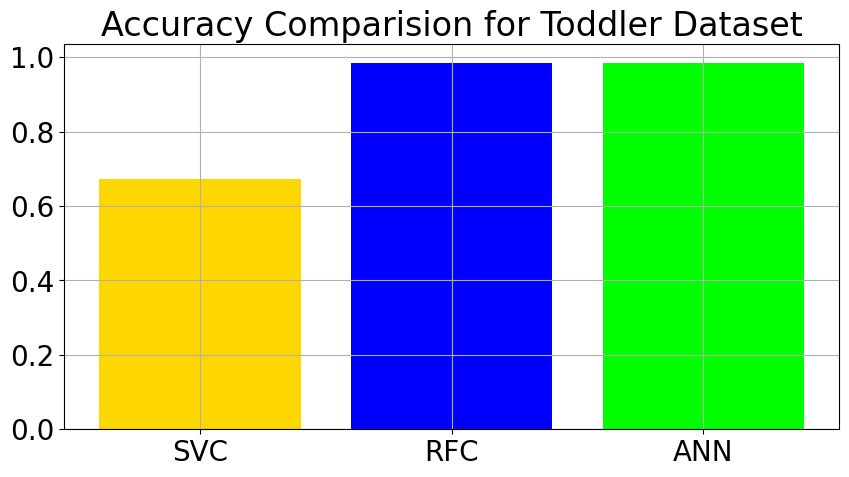

In [ ]:
data=[svc_accuracy,RF_accuracy,ann_accuracy]
labels=["SVC","RFC","ANN"]
colors=["gold","blue","lime"]
plt.figure(figsize=(10,5))
plt.grid()
plt.bar(x=labels,height=data,color=colors)
plt.title(label="Accuracy Comparision for Toddler Dataset")
plt.show()

## Accuracy Comparision for different test size of Toddler Dataset

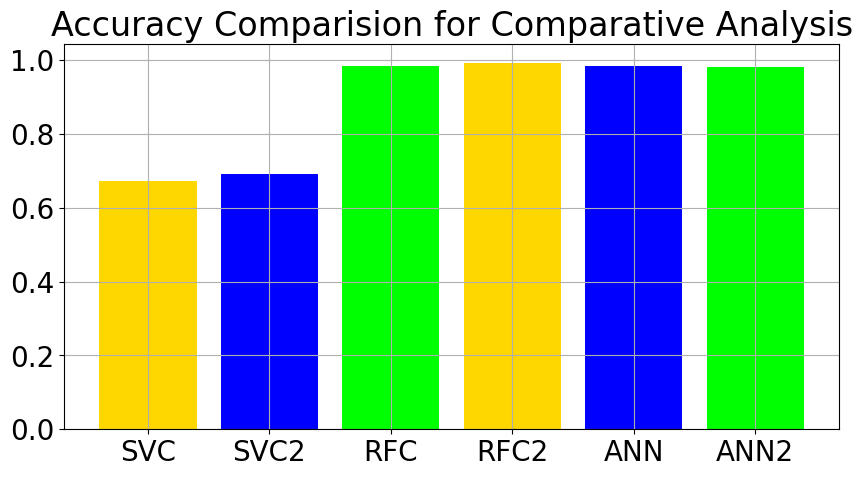

In [598]:
data=[svc_accuracy,svc_accuracy2,RF_accuracy,RF_accuracy2,ann_accuracy,ann_accuracy2]
labels=["SVC","SVC2","RFC","RFC2","ANN","ANN2"]
colors=["gold","blue","lime"]
plt.figure(figsize=(10,5))
plt.grid()
plt.bar(x=labels,height=data,color=colors)
plt.title(label="Accuracy Comparision for Comparative Analysis")
plt.show()

In [ ]:
print("Middle aged adults with autism are 2.6 times more likely to be diagnosed with Alzheimer's disease")

Middle aged adults with autism are 2.6 times more likely to be diagnosed with Alzheimer's disease
